<a href="https://colab.research.google.com/github/blipblopblop/facialExprRecog/blob/main/Facial_Expression_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle Upload

##Setting up

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import os
import random
import pandas as pd
import numpy as np
from shutil import copyfile
from shutil import move

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/MyDrive/'4th year'/APS360/Project/Code/Data/Kaggle.zip > /dev/null #Aya

#!unzip gdrive/MyDrive/'APS360'/Kaggle.zip > /dev/null #OMAR


replace labels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
#putting folders in a differnt folder
data_dir = '/content/'

classes = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
source_path=[f'/content/{a}' for a in classes]
print(source_path)

classes_dir=[f'{a}_dir' for a in classes]
print(classes_dir)

for cl_dir,cl_path in zip(classes_dir,source_path):
    print(cl_dir,': ',len(os.listdir(cl_path)))

!pwd

try:
    os.mkdir('/content/FaceImages')

except OSError:
    pass

PATH='/content/FaceImages'

dir_path=[f'/content/FaceImages/{a}' for a in classes]
print('\n',dir_path)

for Dir_path2 in dir_path:
    try:
        os.mkdir(Dir_path2)
    except OSError:
        pass


def split_data(SOURCE, FILE):
    files = []

    for filename in os.listdir(SOURCE):
        file = SOURCE +'/'+ filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    length = int( len(files))

    shuffled_set = random.sample(files, len(files))
    set = shuffled_set[0:length]


    #print(len(training_set))
    #print(len(validation_set))
    #print(len(testing_set))
    
    for filename in set:
        this_file = SOURCE +'/'+ filename
        destination = FILE +'/'+ filename
        move(this_file, destination)
   
for source,train_dir_path, in zip(source_path,\
                                dir_path):
    #print('source: ',source,'\n', train_dir_path,'\n',val_dir_path,'\n')
    split_data(source,train_dir_path)
    #print('Splitting \n')

['/content/anger', '/content/contempt', '/content/disgust', '/content/fear', '/content/happy', '/content/neutral', '/content/sad', '/content/surprise']
['anger_dir', 'contempt_dir', 'disgust_dir', 'fear_dir', 'happy_dir', 'neutral_dir', 'sad_dir', 'surprise_dir']
anger_dir :  3638
contempt_dir :  3179
disgust_dir :  2660
fear_dir :  3622
happy_dir :  5045
neutral_dir :  5132
sad_dir :  3430
surprise_dir :  4296
/content

 ['/content/FaceImages/anger', '/content/FaceImages/contempt', '/content/FaceImages/disgust', '/content/FaceImages/fear', '/content/FaceImages/happy', '/content/FaceImages/neutral', '/content/FaceImages/sad', '/content/FaceImages/surprise']


##Exploring dataset

In [ ]:
print(os.listdir('/content/FaceImages/'))

['surprise', 'fear', 'sad', 'happy', 'neutral', 'disgust', 'contempt', 'anger']


In [ ]:
def plot_and_shape (Category, path):
  Face = plt.imread(path)
  print(Category)
  plt.imshow(Face)
  plt.show()
  #plt.label(Category)
  print(Face.shape)

Angry


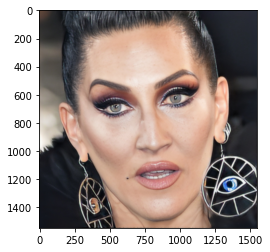

(1547, 1547, 3)
Angry


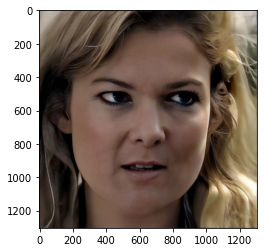

(1303, 1303, 3)
Angry


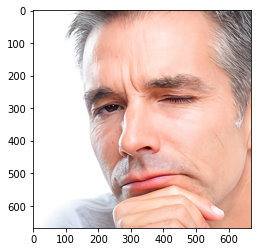

(668, 668, 3)
Contempt


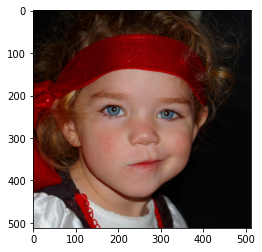

(512, 512, 3)
Contempt


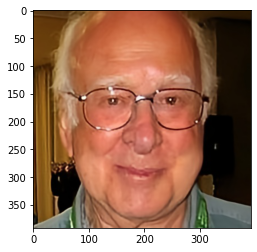

(392, 392, 3)
Contempt


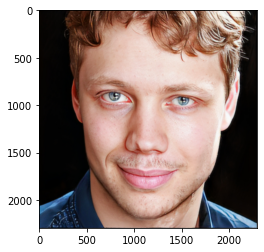

(2293, 2293, 3)
Disgust


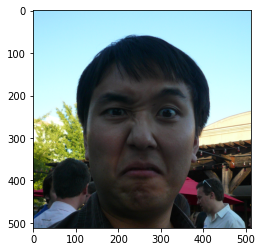

(512, 512, 3)
Disgust


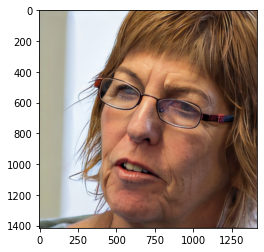

(1414, 1414, 3)
Disgust


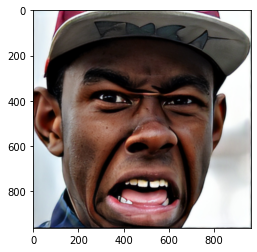

(963, 963, 3)


In [ ]:
plot_and_shape ("Angry", "/content/FaceImages/anger/image0000006.jpg")
plot_and_shape ("Angry", "/content/FaceImages/anger/image0000343.jpg")
plot_and_shape ("Angry", "/content/FaceImages/anger/image0005102.jpg")
plot_and_shape ("Contempt", "/content/FaceImages/contempt/ffhq_12.png")
plot_and_shape ("Contempt", "/content/FaceImages/contempt/image0001046.jpg")
plot_and_shape ("Contempt", "/content/FaceImages/contempt/image0013113.jpg")
plot_and_shape ("Disgust", "/content/FaceImages/disgust/ffhq_15.png")
plot_and_shape ("Disgust", "/content/FaceImages/disgust/image0003672.jpg")
plot_and_shape ("Disgust", "/content/FaceImages/disgust/image0010383.jpg")


##Splitting data
https://colab.research.google.com/drive/14srY1QRnYl0phKZIMA3kw8BSqTP3PNDS#scrollTo=gd2f33ebCda9
https://medium.com/swlh/setting-up-google-colab-for-cnn-modeling-55b5208599c4


<font color = red> Sizes vary EXREMELY

In [ ]:
data_dir = '/content/FaceImages'
classes=os.listdir(data_dir)
print(classes)

source_path=[f'/content/FaceImages/{a}' for a in classes]
print(source_path)

classes_dir=[f'{a}_dir' for a in classes]
print(classes_dir)

for cl_dir,cl_path in zip(classes_dir,source_path):
    print(cl_dir,': ',len(os.listdir(cl_path)))

!pwd

try:
    os.mkdir('/content/training')
    os.mkdir('/content/validation')
    os.mkdir('/content/testing')
except OSError:
    pass

TRAINING_PATH='/content/training'
VALIDATION_PATH='/content/validation'
training_dir_path=[f'/content/training/{a}' for a in classes]
print('\n',training_dir_path)
validation_dir_path=[f'/content/validation/{a}' for a in classes]
print('\n',validation_dir_path)
testing_dir_path=[f'/content/testing/{a}' for a in classes]
print('\n',testing_dir_path)

for train_dir_path in training_dir_path:
    try:
        os.mkdir(train_dir_path)
    except OSError:
        pass

for val_dir_path in validation_dir_path:
    try:
        os.mkdir(val_dir_path)
    except OSError:
        pass

for test_dir_path in testing_dir_path:
    try:
        os.mkdir(test_dir_path)
    except OSError:
        pass

def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
    files = []
    print('Split Data')
    for filename in os.listdir(SOURCE):
        file = SOURCE +'/'+ filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int( len(files)* SPLIT_SIZE)
    testing_length = int(len(files) * 0.10) #TOOK TOO LONG SO MADE IT SMALLER
    validation_length = int(len(files) - training_length - testing_length) #TOOK TOO LONG SO MADE IT SMALLER
    
    print('SOURCE: ',SOURCE, '\n TRAINING', TRAINING, '\n VALIDATION',VALIDATION, '\n ',len(files))
    print('training_length:',training_length)
    print('validation_length:',validation_length)
    print('testing_length:',testing_length)
    
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[training_length:(training_length+validation_length)]
    testing_set=shuffled_set[:testing_length]

    #print(len(training_set))
    #print(len(validation_set))
    #print(len(testing_set))
    
    for filename in training_set:
        this_file = SOURCE +'/'+ filename
        destination = TRAINING +'/'+ filename
        copyfile(this_file, destination)
    

    for filename in validation_set:
        this_file = SOURCE +'/'+ filename
        destination = VALIDATION+'/' + filename
        copyfile(this_file, destination)
        
    for filename in testing_set:
        this_file = SOURCE +'/'+ filename
        destination = TESTING+'/' + filename
        copyfile(this_file, destination)

split_size = .7 #TOOK TOO LONG SO MADE IT SMALLER
for source,train_dir_path,val_dir_path,test_dir_path in zip(source_path,\
                                training_dir_path,validation_dir_path, testing_dir_path):
    #print('source: ',source,'\n', train_dir_path,'\n',val_dir_path,'\n')
    split_data(source,train_dir_path,val_dir_path,test_dir_path, split_size)
    print('Splitting \n')

['surprise', 'fear', 'sad', 'happy', 'neutral', 'disgust', 'contempt', 'anger']
['/content/FaceImages/surprise', '/content/FaceImages/fear', '/content/FaceImages/sad', '/content/FaceImages/happy', '/content/FaceImages/neutral', '/content/FaceImages/disgust', '/content/FaceImages/contempt', '/content/FaceImages/anger']
['surprise_dir', 'fear_dir', 'sad_dir', 'happy_dir', 'neutral_dir', 'disgust_dir', 'contempt_dir', 'anger_dir']
surprise_dir :  4296
fear_dir :  3622
sad_dir :  3430
happy_dir :  5045
neutral_dir :  5132
disgust_dir :  2660
contempt_dir :  3179
anger_dir :  3638
/content

 ['/content/training/surprise', '/content/training/fear', '/content/training/sad', '/content/training/happy', '/content/training/neutral', '/content/training/disgust', '/content/training/contempt', '/content/training/anger']

 ['/content/validation/surprise', '/content/validation/fear', '/content/validation/sad', '/content/validation/happy', '/content/validation/neutral', '/content/validation/disgust', '

#####making into generator

In [ ]:
# https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

transform = torchvision.transforms.Compose([transforms.Resize([224,224]), transforms.ToTensor()])


data_training = torchvision.datasets.ImageFolder(root ='/content/training', transform = transform)
data_testing = torchvision.datasets.ImageFolder(root ='/content/testing', transform = transform)
data_validation = torchvision.datasets.ImageFolder(root ='/content/validation', transform = transform)


batch_size = 32
num_workers = 1
train_loader = torch.utils.data.DataLoader(data_training,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers = num_workers)
test_loader = torch.utils.data.DataLoader(data_testing,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers = num_workers)
val_loader = torch.utils.data.DataLoader(data_validation,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers = num_workers)



##Data processing

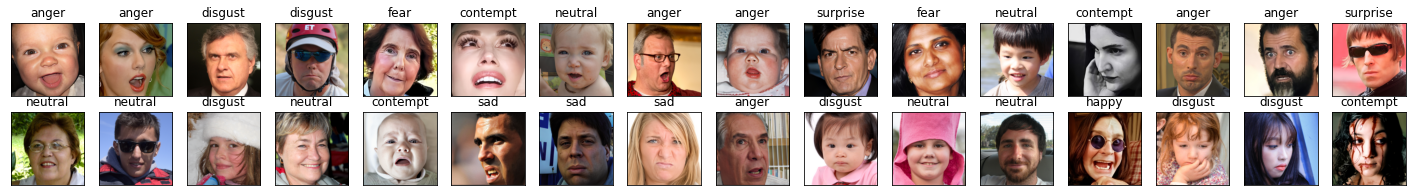

In [ ]:
dataiter = iter(train_loader)
images,labels = dataiter.next()
images = images.numpy()
x=32
fig = plt.figure(figsize = (25,3))
for idx in np.arange(x):

  ax = fig.add_subplot(2, x/2, idx+1, xticks = [], yticks = [])
  plt.imshow(np.transpose(images[idx], (1, 2, 0))) 
  ax.set_title(classes[labels[idx]])

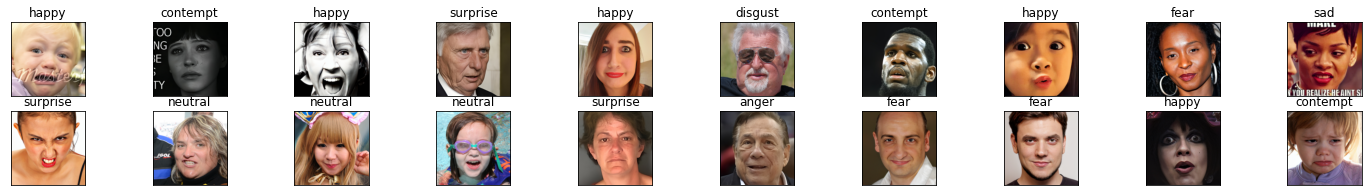

In [ ]:
dataiter = iter(train_loader)
images,labels = dataiter.next()
images = images.numpy()
x=20

fig = plt.figure(figsize = (25,3))
for idx in np.arange(x):
  
  ax = fig.add_subplot(2, x/2, idx+1, xticks = [], yticks = [])
  plt.imshow(np.transpose(images[idx], (1, 2, 0))) 
  ax.set_title(classes[labels[idx]])

####Forming smaller datasets

In [ ]:
###MAKINNG SMALL DATASET
data_dir = '/content/FaceImages'
classes=os.listdir(data_dir)
print(classes)

source_path=[f'/content/FaceImages/{a}' for a in classes]
print(source_path)

classes_dir=[f'{a}_dir' for a in classes]
print(classes_dir)

for cl_dir,cl_path in zip(classes_dir,source_path):
    print(cl_dir,': ',len(os.listdir(cl_path)))

!pwd

try:
    os.mkdir('/content/training_small')
    os.mkdir('/content/validation_small')
    os.mkdir('/content/testing_small')
except OSError:
    pass

TRAINING_PATH='/content/training_small'
VALIDATION_PATH='/content/validation_small'
training_dir_path=[f'/content/training_small/{a}' for a in classes]
print('\n',training_dir_path)
validation_dir_path=[f'/content/validation_small/{a}' for a in classes]
print('\n',validation_dir_path)
testing_dir_path=[f'/content/testing_small/{a}' for a in classes]
print('\n',testing_dir_path)

for train_dir_path in training_dir_path:
    try:
        os.mkdir(train_dir_path)
    except OSError:
        pass

for val_dir_path in validation_dir_path:
    try:
        os.mkdir(val_dir_path)
    except OSError:
        pass

for test_dir_path in testing_dir_path:
    try:
        os.mkdir(test_dir_path)
    except OSError:
        pass

def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
    files = []
    print('Split Data')
    for filename in os.listdir(SOURCE):
        file = SOURCE +'/'+ filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int( len(files)* SPLIT_SIZE)
    testing_length = int(len(files) * 0.002)
    validation_length = int(len(files) * 0.005)
    
    print('SOURCE: ',SOURCE, '\n TRAINING', TRAINING, '\n VALIDATION',VALIDATION, '\n ',len(files))
    print('training_length:',training_length)
    print('validation_length:',validation_length)
    print('testing_length:',testing_length)
    
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[training_length:(training_length+validation_length)]
    testing_set=shuffled_set[:testing_length]

    #print(len(training_set))
    #print(len(validation_set))
    #print(len(testing_set))
    
    for filename in training_set:
        this_file = SOURCE +'/'+ filename
        destination = TRAINING +'/'+ filename
        copyfile(this_file, destination)
    

    for filename in validation_set:
        this_file = SOURCE +'/'+ filename
        destination = VALIDATION+'/' + filename
        copyfile(this_file, destination)
        
    for filename in testing_set:
        this_file = SOURCE +'/'+ filename
        destination = TESTING+'/' + filename
        copyfile(this_file, destination)

split_size = .01
for source,train_dir_path,val_dir_path,test_dir_path in zip(source_path,\
                                training_dir_path,validation_dir_path, testing_dir_path):
    #print('source: ',source,'\n', train_dir_path,'\n',val_dir_path,'\n')
    split_data(source,train_dir_path,val_dir_path,test_dir_path, split_size)
    print('Splitting \n')

['surprise', 'fear', 'sad', 'happy', 'neutral', 'disgust', 'contempt', 'anger']
['/content/FaceImages/surprise', '/content/FaceImages/fear', '/content/FaceImages/sad', '/content/FaceImages/happy', '/content/FaceImages/neutral', '/content/FaceImages/disgust', '/content/FaceImages/contempt', '/content/FaceImages/anger']
['surprise_dir', 'fear_dir', 'sad_dir', 'happy_dir', 'neutral_dir', 'disgust_dir', 'contempt_dir', 'anger_dir']
surprise_dir :  4296
fear_dir :  3622
sad_dir :  3430
happy_dir :  5045
neutral_dir :  5132
disgust_dir :  2660
contempt_dir :  3179
anger_dir :  3638
/content

 ['/content/training_small/surprise', '/content/training_small/fear', '/content/training_small/sad', '/content/training_small/happy', '/content/training_small/neutral', '/content/training_small/disgust', '/content/training_small/contempt', '/content/training_small/anger']

 ['/content/validation_small/surprise', '/content/validation_small/fear', '/content/validation_small/sad', '/content/validation_small

In [ ]:
# https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

transform = torchvision.transforms.Compose([transforms.Resize([224,224]), transforms.ToTensor()])

data_training_small = torchvision.datasets.ImageFolder(root ='/content/training_small', transform = transform)
data_testing_small = torchvision.datasets.ImageFolder(root ='/content/testing_small', transform = transform)
data_validation_small = torchvision.datasets.ImageFolder(root ='/content/validation_small', transform = transform)


batch_size = 32

train_loader_small = torch.utils.data.DataLoader(data_training_small,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader_small = torch.utils.data.DataLoader(data_testing_small,
                                          batch_size=batch_size,
                                          shuffle=True)
val_loader_small = torch.utils.data.DataLoader(data_validation_small,
                                          batch_size=batch_size,
                                          shuffle=True)


At this point we have created 6 loaders:
1. train_loader
1. test_loader
2. val_loader
3. train_loader_small
4. test_loader_small
5. val_loader_small

<font color = orange> note to self make sure it runs correctly and what about image size, we also need to do the analysis so like the grid of pictrues we say

input [32,3,224,224]

#Baseline model section

Our baseline model is a CNN that takes in the 244x244 sized image and predicts the expression. The model has 2 convolutional layers at two fully connected layers. 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed, starting pt(random), save weights, cmp different models based on the different seed values

Building baseline model

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__() 
    self.name = "CNN"
    self.conv1 = nn.Conv2d(3, 5, 5) 
    self.pool = nn.MaxPool2d(2, 2) 
    self.conv2 = nn.Conv2d(5, 10, 5) 
    self.fc1 = nn.Linear(10*53*53, 64)
    self.fc2 = nn.Linear (64, 9)

  def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10*53*53)
        x = F.relu(self.fc1(x)) 
        x = self.fc2(x)
        return x

Training the baseline model

In [ ]:
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size, learning_rate, epoch)
    return path

def accuracy(net, data_ld):
  corr = 0
  tot = 0
  for i, data in data_ld:
    if torch.cuda.is_available():
      i = i.cuda()
      data = data.cuda()

    # Forward pass, backward pass, and optimize
    outputs = net(i)
    pred = outputs.max(1, keepdim=True)[1] # select index with maximum prediction score
    corr += pred.eq(data.view_as(pred)).sum().item()
    tot += i.shape[0]
  return corr / tot

def train_net(net, batch_size=24, learning_rate=0.01, num_epochs=30):

    # Train a classifier on the possible expressions
    target_classes = ['surprise', 'fear', 'sad', 'happy', 'neutral', 'disgust', 'contempt', 'anger']

    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)

    train_loader, val_loader, test_loader = get_data_loader(
            target_classes, batch_size)
    
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy because it is 
    # a multi-classification problem. 
    # Optimizer will be SGD with Adam Momentum as I want the weights to
    # each weight to have its own rate.
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_epoch = 0
        for i, data in iter(train_loader):
            
            if torch.cuda.is_available():
                i = i.cuda()
                data = data.cuda()

            # Zero the parameter gradients
            optimizer.zero_grad()
                
            # Forward pass, backward pass, and optimize
            outputs = net(i)
            loss = criterion(outputs, data.long())
            loss.backward()
            optimizer.step()

            total_epoch += len(data)
            
        # get the accuracy
        print(accuracy(net, train_loader))

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
        
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

In [ ]:
cnn_model = CNN()
train_net(cnn_model, batch_size=24, learning_rate=0.01, num_epochs=30)

#Model sectionn (CNN and transfer learning)

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

##Settinng up datasets

###For regular dataset

In [ ]:
# https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

transform = torchvision.transforms.Compose([transforms.Resize([224,224]), transforms.ToTensor()])


data_training = torchvision.datasets.ImageFolder(root ='/content/training', transform = transform)
data_validation = torchvision.datasets.ImageFolder(root ='/content/validation', transform = transform)
data_testing = torchvision.datasets.ImageFolder(root ='/content/testing', transform = transform)


batch_size = 1
num_workers = 1
train_loader2 = torch.utils.data.DataLoader(data_training,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers = num_workers)
test_loader2 = torch.utils.data.DataLoader(data_testing,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers = num_workers)
val_loader2 = torch.utils.data.DataLoader(data_validation,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers = num_workers)

# Save Features to Folder

import os

import torchvision.models

alexnet = torchvision.models.alexnet(pretrained= True)

# location on Google Drive
#master_path = ‘/content/gdrive/My Drive/university/school stuff /Year3/APS360/Labs/Lab 3/Data/Features'
   

classes = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

   

# save features to folder
n=0

for img, label in train_loader2:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = '/content/training/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n+=1

for img, label in val_loader2:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = '/content/validation/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n+=1

for img, label in test_loader2:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = '/content/testing/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n+=1




In [ ]:
#load features 
# location on Google Drive 
master_path='/content/'

train_features = torchvision.datasets.DatasetFolder (master_path  + 'training/', loader=torch.load, extensions=('.tensor')) 
val_features = torchvision.datasets.DatasetFolder (master_path  + 'validation/', loader=torch.load, extensions=('.tensor')) 
test_features = torchvision.datasets.DatasetFolder (master_path  + 'testing/', loader=torch.load, extensions=('.tensor'))


# Prepare Dataloader 
batch_size = 32 
num_workers = 1 

train_feature_loader = torch.utils.data.DataLoader(train_features, 
                                                   batch_size=batch_size,
                                                   num_workers=num_workers, 
                                                   shuffle = True) 
val_feature_loader = torch.utils.data.DataLoader (val_features, 
                                                   batch_size=batch_size,
                                                   num_workers=num_workers, 
                                                   shuffle = True) 
test_feature_loader = torch.utils.data.DataLoader (test_features, 
                                                   batch_size=batch_size,
                                                   num_workers=num_workers, 
                                                   shuffle = True) 
# Verification Step - obtain one batch of features 
dataiter = iter(train_feature_loader) 
features, labels = dataiter.next() 
print(features.shape) 
print(labels.shape)


torch.Size([32, 256, 6, 6])
torch.Size([32])


###FOR SMALL DATASET

In [ ]:
# https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

transform = torchvision.transforms.Compose([transforms.Resize([224,224]), transforms.ToTensor()])

data_training_small = torchvision.datasets.ImageFolder(root ='/content/training_small', transform = transform)
data_testing_small = torchvision.datasets.ImageFolder(root ='/content/testing_small', transform = transform)
data_validation_small = torchvision.datasets.ImageFolder(root ='/content/validation_small', transform = transform)


batch_size = 1
num_workers = 1


train_loader_small2 = torch.utils.data.DataLoader(data_training_small,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers = num_workers)
val_loader_small2 = torch.utils.data.DataLoader(data_validation_small,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers = num_workers)
test_loader_small2 = torch.utils.data.DataLoader(data_testing_small,
                                          batch_size=batch_size,
                                          shuffle=True, num_workers = num_workers)

# Save Features to Folder

import os

import torchvision.models

alexnet = torchvision.models.alexnet(pretrained= True)

# location on Google Drive
#master_path = ‘/content/gdrive/My Drive/university/school stuff /Year3/APS360/Labs/Lab 3/Data/Features'
   

classes = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

   

# save features to folder
n=0

for img, label in train_loader_small2:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = '/content/training_small/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n+=1

for img, label in val_loader_small2:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = '/content/validation_small/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n+=1

for img, label in test_loader_small2:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = '/content/testing_small/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n+=1




In [ ]:
#load features 
# location on Google Drive 
master_path='/content/'
train_features_small_ds = torchvision.datasets. DatasetFolder (master_path  + 'training_small/', loader=torch.load, extensions=('.tensor')) 
val_features_small_ds = torchvision.datasets.DatasetFolder (master_path  + 'validation_small/', loader=torch.load, extensions=('.tensor')) 
test_features_small_ds = torchvision.datasets. DatasetFolder (master_path  + 'testing_small/', loader=torch.load, extensions=('.tensor'))


# Prepare Dataloader 
batch_size = 32 
num_workers = 1 

train_feature_loader_small_ds = torch.utils.data.DataLoader(train_features_small_ds, 
                                                   batch_size=batch_size,
                                                   num_workers=num_workers, 
                                                   shuffle = True) 
val_feature_loader_small_ds = torch.utils.data.DataLoader (val_features_small_ds, 
                                                   batch_size=batch_size,
                                                   num_workers=num_workers, 
                                                   shuffle = True) 
test_feature_loader_small_ds = torch.utils.data.DataLoader (test_features_small_ds, 
                                                   batch_size=batch_size,
                                                   num_workers=num_workers, 
                                                   shuffle = True) 
# Verification Step - obtain one batch of features 
dataiter = iter(train_feature_loader_small_ds) 
features, labels = dataiter.next() 
print(features.shape) 
print(labels.shape)


torch.Size([32, 256, 6, 6])
torch.Size([32])


##building model

In [ ]:
torch.manual_seed (10) # set the random seed 
from math import floor


class AlexNetClassifier (nn.Module): 
  def __init__(self, name = "AlexNet_classifier"):
    super(AlexNetClassifier, self).__init__() 
    self.conv1= nn. Conv2d(256, 512, 3) 
    self.pool = nn.MaxPool2d(2, 2)

    # Computing the correct input size into the Pully Connected Layer 
    self.x = floor(( 6 - 3 + 1)/2) 
    self.FC_input = 512*self.x*self.x

    self.fc1 = nn.Linear(self.FC_input, 32) 
    self.fc2 = nn.Linear(32, 9)

    self.name = name

  def forward(self, features):
    x = self.pool(F.relu(self.conv1(features))) 
    x = x.view(-1, self.FC_input) 
    x = self.fc1(x)
    x = F.relu(x) 
    x = self.fc2(x) 
    return F.softmax(x, dim=1)

##defining training model

In [ ]:
def get_model_name (name, batch_size, learning_rate, epoch):
  path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name, batch_size, learning_rate, epoch) 
  return path



def get_accuracy (model, data_loader):
  correct = 0 
  total = 0

  for imgs, labels in data_loader:
        #To Enable GPU Usage

    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()  #puttimg images on the GPU
      labels = labels.cuda() #putting the labels on the GPU
    #############################################

    output = model (imgs) #select index with maximum prediction score 
    pred = output.max(1, keepdim=True) [1] 
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape [0] 
  return correct / total

In [ ]:
def train(model, train_dataset, val_dataset, batch_size=128, num_epochs=20, learn_rate=0.001):
  torch.manual_seed (10)
  criterion = nn.CrossEntropyLoss() 
  optimizer = optim.Adam(model.parameters(), lr=learn_rate)
 
  train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
  
  #train_loss = np.zeros(num_epochs)

  train_acc = np.zeros(num_epochs) 
  val_acc = np.zeros (num_epochs)

  iters = []
  losses = []

  # training 
  print("Training Started...") 
  n = 0 
  for epoch in range(num_epochs):
    total_train_loss = 0.0 
    total_train_err = 0.0 
    total_images = 0 
    total_epoch = 0

    for imgs, labels in train_loader:#iter(train_loader):


      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()  #puttimg images on the GPU
        labels = labels.cuda() #putting the labels on the GPU
      #############################################   

      out = model(imgs)
      # forward pass 
      loss = criterion (out, labels)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      n+=1


      iters.append(n)
      losses.append(float(loss)/batch_size)             # compute *average* loss


    # track accuracy 
    train_acc[epoch] = get_accuracy (model, train_loader) 
    val_acc[epoch] = get_accuracy (model, val_loader)

    #train_err[epoch] = float(total_train_err) / total_epoch #caclute the epoch training error (tota_tain_err will then reset to 0)
    #train_loss[epoch] = float(total_train_loss) / (i+1) #Whats the i+1, why does it change??????????????????????
    print(("Epoch {}:, \n Train loss: {}"+
            "\n Training Acc: {}, \n Validation Acc: {}").format(
                epoch + 1,
                losses[epoch],
                train_acc[epoch],
                val_acc[epoch]))
  
    #print(("Epoch {}: Train acc: {} |" + "Validation acc: {}").format(epoch, train_acc[epoch-1]), val_acc[epoch-1])
    model_path = get_model_name (model.name, batch_size, learn_rate, epoch) 
    torch.save (model.state_dict(), model_path)

  print("\n Training Complete...") 

  epochs = np.arange(1, num_epochs + 1)
  print("Final Training Accuracy: {}".format(train_acc[-1]))
  print("Final Validation Accuracy: {}".format(val_acc[-1]))

  plt.title("Train vs Validation Accuracy")
  n = len(train_acc) # number of epochs
  plt.plot(range(1,n+1), train_acc, label="Train")
  plt.plot(range(1,n+1), val_acc, label="Validation")
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.legend(loc='best')
  plt.show()

  #plt.title("Train vs Validation Loss")
  #plt.plot(range(1,n+1), train_loss, label="Train")
  #plt.plot(range(1,n+1), val_loss, label="Validation")
  #plt.xlabel("Epoch")
  #plt.ylabel("Loss")
  #plt.legend(loc='best')
  #plt.show()

  return train_acc, val_acc, epochs

###TESTING

####Small dataset

Training Started...
Epoch 1:, 
 Train loss: 0.017189204692840576
 Training Acc: 0.2581699346405229, 
 Validation Acc: 0.20394736842105263
Epoch 2:, 
 Train loss: 0.017068274319171906
 Training Acc: 0.26143790849673204, 
 Validation Acc: 0.17763157894736842
Epoch 3:, 
 Train loss: 0.017474617809057236
 Training Acc: 0.3300653594771242, 
 Validation Acc: 0.2236842105263158
Epoch 4:, 
 Train loss: 0.01657690666615963
 Training Acc: 0.43137254901960786, 
 Validation Acc: 0.26973684210526316
Epoch 5:, 
 Train loss: 0.01696770451962948
 Training Acc: 0.4934640522875817, 
 Validation Acc: 0.32894736842105265
Epoch 6:, 
 Train loss: 0.016710147261619568
 Training Acc: 0.5522875816993464, 
 Validation Acc: 0.2894736842105263
Epoch 7:, 
 Train loss: 0.01647433452308178
 Training Acc: 0.6372549019607843, 
 Validation Acc: 0.34210526315789475
Epoch 8:, 
 Train loss: 0.016351481899619102
 Training Acc: 0.6372549019607843, 
 Validation Acc: 0.34868421052631576
Epoch 9:, 
 Train loss: 0.0158604159951

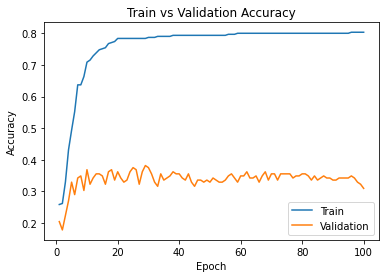

(array([0.25816993, 0.26143791, 0.33006536, 0.43137255, 0.49346405,
        0.55228758, 0.6372549 , 0.6372549 , 0.66339869, 0.70915033,
        0.71568627, 0.72875817, 0.73856209, 0.74836601, 0.75163399,
        0.75490196, 0.76797386, 0.77124183, 0.7745098 , 0.78431373,
        0.78431373, 0.78431373, 0.78431373, 0.78431373, 0.78431373,
        0.78431373, 0.78431373, 0.78431373, 0.78431373, 0.7875817 ,
        0.7875817 , 0.7875817 , 0.79084967, 0.79084967, 0.79084967,
        0.79084967, 0.79084967, 0.79411765, 0.79411765, 0.79411765,
        0.79411765, 0.79411765, 0.79411765, 0.79411765, 0.79411765,
        0.79411765, 0.79411765, 0.79411765, 0.79411765, 0.79411765,
        0.79411765, 0.79411765, 0.79411765, 0.79411765, 0.79411765,
        0.79738562, 0.79738562, 0.79738562, 0.80065359, 0.80065359,
        0.80065359, 0.80065359, 0.80065359, 0.80065359, 0.80065359,
        0.80065359, 0.80065359, 0.80065359, 0.80065359, 0.80065359,
        0.80065359, 0.80065359, 0.80065359, 0.80

In [ ]:
net = AlexNetClassifier() 
use_cuda = True

if use_cuda and torch.cuda.is_available():
  ANC.cuda()

train(net, train_features_small_ds, val_features_small_ds, batch_size=128, num_epochs=100, learn_rate=0.001)


####Regular Dataset testing and hyperparameter tuning


Training Started...
Epoch 1:, 
 Train loss: 0.017108557745814323
 Training Acc: 0.4924877868928012, 
 Validation Acc: 0.4778475914290317
Epoch 2:, 
 Train loss: 0.017021114006638527
 Training Acc: 0.561756843948751, 
 Validation Acc: 0.5372966006122121

 Training Complete...
Final Training Accuracy: 0.561756843948751
Final Validation Accuracy: 0.5372966006122121


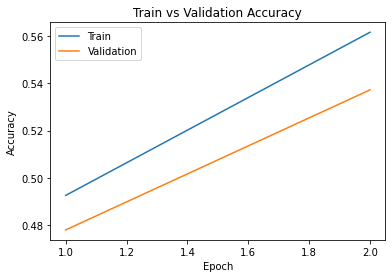

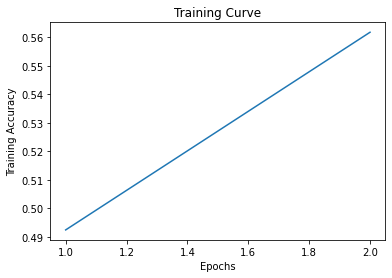

Text(0, 0.5, 'Validation Accuracy')

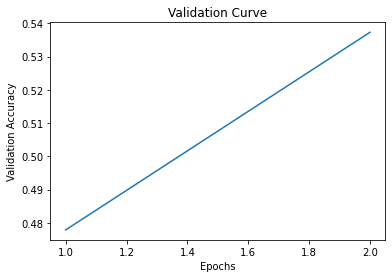

In [ ]:
net = AlexNetClassifier() 
use_cuda = True

if use_cuda and torch.cuda.is_available():
  ANC.cuda()

train_acc, val_acc, epochs = train(net, train_features, val_features, batch_size=128, num_epochs=2, learn_rate=0.001)
plt.plot(epochs, train_acc) 
plt.title( "Training Curve") 
plt.xlabel("Epochs") 
plt.ylabel("Training Accuracy") 
plt.show()

plt.plot(epochs, val_acc) 
plt.title("Validation Curve") 
plt.xlabel("Epochs") 
plt.ylabel("Validation Accuracy")

Training Started...
Final Training Accuracy: 0.8560696838418287
Final Validation Accuracy: 0.583373610439826


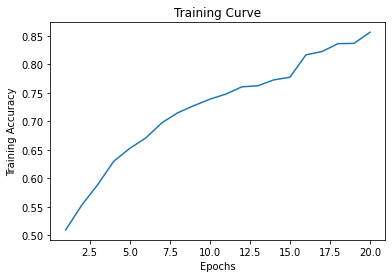

Text(0, 0.5, 'Validation Accuracy')

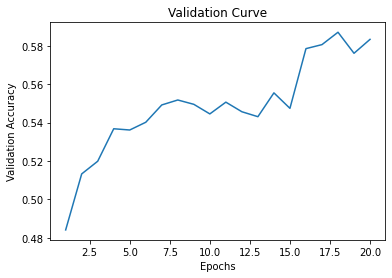

In [ ]:
net = AlexNetClassifier() 
use_cuda = True

if use_cuda and torch.cuda.is_available():
  ANC.cuda()

train_acc, val_acc, epochs = train(net, train_features, val_features, batch_size=128, num_epochs=20, learn_rate=0.001)
plt.plot(epochs, train_acc) 
plt.title( "Training Curve") 
plt.xlabel("Epochs") 
plt.ylabel("Training Accuracy") 
plt.show()

plt.plot(epochs, val_acc) 
plt.title("Validation Curve") 
plt.xlabel("Epochs") 
plt.ylabel("Validation Accuracy")

##Playing with hyperparameters

Training Started...
Epoch 1:, 
 Train loss: 0.017170682549476624
 Training Acc: 0.11764705882352941, 
 Validation Acc: 0.11842105263157894
Epoch 2:, 
 Train loss: 0.016955651342868805
 Training Acc: 0.26143790849673204, 
 Validation Acc: 0.19736842105263158
Epoch 3:, 
 Train loss: 0.01755613274872303
 Training Acc: 0.4150326797385621, 
 Validation Acc: 0.23684210526315788
Epoch 4:, 
 Train loss: 0.017801538109779358
 Training Acc: 0.48366013071895425, 
 Validation Acc: 0.28289473684210525
Epoch 5:, 
 Train loss: 0.016878120601177216
 Training Acc: 0.4803921568627451, 
 Validation Acc: 0.2894736842105263
Epoch 6:, 
 Train loss: 0.016164841130375862
 Training Acc: 0.4673202614379085, 
 Validation Acc: 0.26973684210526316
Epoch 7:, 
 Train loss: 0.016404027119278908
 Training Acc: 0.5947712418300654, 
 Validation Acc: 0.2631578947368421
Epoch 8:, 
 Train loss: 0.016272734850645065
 Training Acc: 0.6111111111111112, 
 Validation Acc: 0.2894736842105263
Epoch 9:, 
 Train loss: 0.01588550582

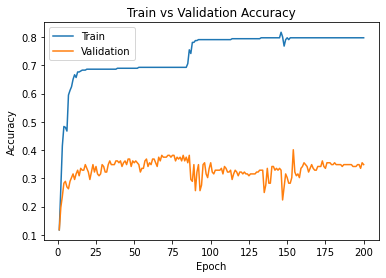

(array([0.11764706, 0.26143791, 0.41503268, 0.48366013, 0.48039216,
        0.46732026, 0.59477124, 0.61111111, 0.62418301, 0.6503268 ,
        0.66666667, 0.65686275, 0.67647059, 0.67647059, 0.67973856,
        0.68300654, 0.68300654, 0.68300654, 0.68627451, 0.68627451,
        0.68627451, 0.68627451, 0.68627451, 0.68627451, 0.68627451,
        0.68627451, 0.68627451, 0.68627451, 0.68627451, 0.68627451,
        0.68627451, 0.68627451, 0.68627451, 0.68627451, 0.68627451,
        0.68627451, 0.68627451, 0.68627451, 0.68954248, 0.68954248,
        0.68954248, 0.68954248, 0.68954248, 0.68954248, 0.68954248,
        0.68954248, 0.68954248, 0.68954248, 0.68954248, 0.68954248,
        0.68954248, 0.68954248, 0.69281046, 0.69281046, 0.69281046,
        0.69281046, 0.69281046, 0.69281046, 0.69281046, 0.69281046,
        0.69281046, 0.69281046, 0.69281046, 0.69281046, 0.69281046,
        0.69281046, 0.69281046, 0.69281046, 0.69281046, 0.69281046,
        0.69281046, 0.69281046, 0.69281046, 0.69

In [ ]:
net = AlexNetClassifier() 
use_cuda = True

if use_cuda and torch.cuda.is_available():
  ANC.cuda()

train(net, train_features_small_ds, val_features_small_ds, batch_size=128, num_epochs=200, learn_rate=0.002)


##Playing with core model